In [1]:
# Data manipulation
import pandas as pd
import seaborn as sns
# инструменты, предназначенные для анализа временных рядов (это также может быть использовано для прогнозирования).
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (
    pairwise_tukeyhsd, MultiComparison)
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/trisha00001/EDA/main/states.csv")
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [3]:
df.corr(numeric_only=True)

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


<Axes: >

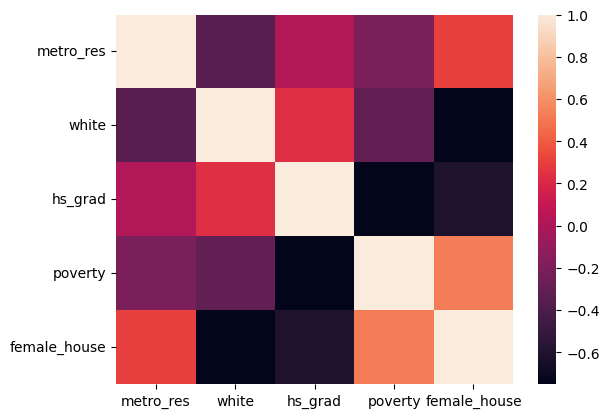

In [4]:
sns.heatmap(df.corr(numeric_only=True))

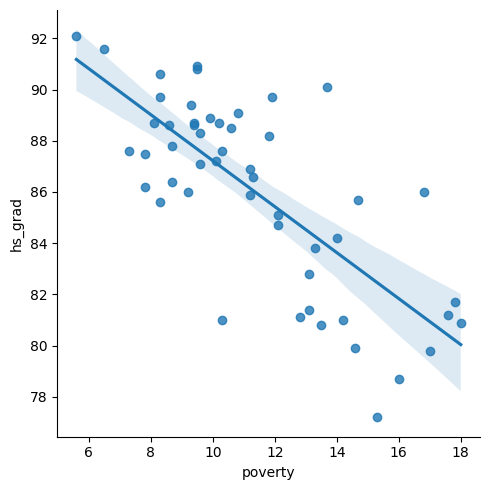

In [5]:
'''
Задача: применим линейную регрессию и проверим, как взаимосвязана бедность (ЗП: povetry)
и уровень образования (предиктор, НП).
- Строим scatter plot, чтобы познакомиться с характером наших переменных.
Видим, что прослеживается линейная зависимость.
- Более того, взаимосвязь отрицательная.
- Если бы рассчитали коэффициент корреляции r=-0.75.
'''
# Будем использовать seaborn (более высокоуровневая библиотема над matplotlib).
#Pandas тоже использует matplotlib, но в чистом виде.
# У seaborn есть 2 графика для регрессии lmplot и regplot.
# В простейшем случае обе функции строят диаграмму рассеивания переменных x и y,
# а затем результирующую линию регрессии и
# 95%-ый доверительный интервал для для этой регрессии: x~y.
# regplot обладает подмножеством функций lmplot.

# Ставим ";" чтобы не выводить лишний текст
sns.lmplot(x="poverty", y="hs_grad",data=df,fit_reg=True);

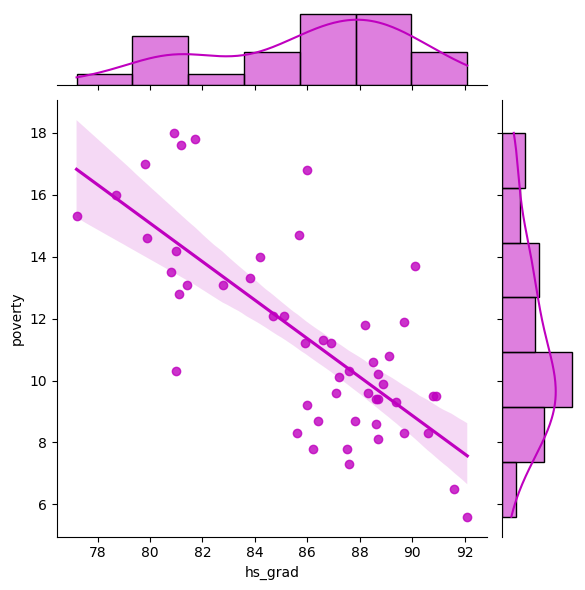

In [6]:

# Еще более наглядный пример графика
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m');

In [7]:
from scipy import (
    misc, stats, ndimage)
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipython-input-7-2275645974.py:1: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import (


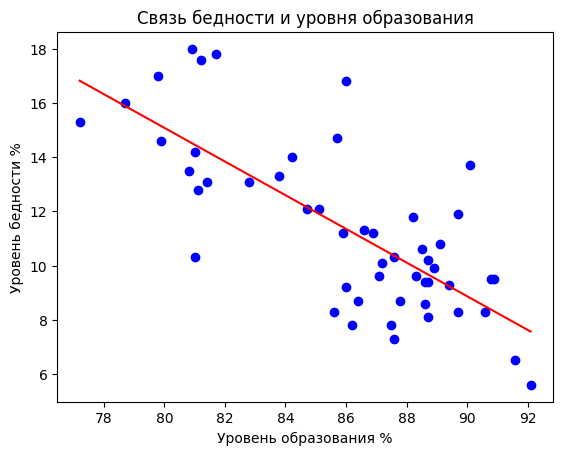

LinregressResult(slope=np.float64(-0.6212167177940106), intercept=np.float64(64.78096577010209), rvalue=np.float64(-0.7468582531582505), pvalue=np.float64(3.10882981031841e-10), stderr=np.float64(0.0790164710017928), intercept_stderr=np.float64(6.802595178281202))

In [8]:
# Можно так решить
x=df["hs_grad"]
y=df["poverty"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию

plt.title("Связь бедности и уровня образования")
plt.xlabel("Уровень образования %")
plt.ylabel("Уровень бедности %")

plt.show() #Рисуем график
stats.linregress (x, y)

In [9]:
print(r_value, p_value, std_err)

-0.7468582531582505 3.10882981031841e-10 0.0790164710017928


In [10]:
OLS_model = ols('poverty ~ hs_grad', data=df).fit()
print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           3.11e-10
Time:                        07:32:29   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0

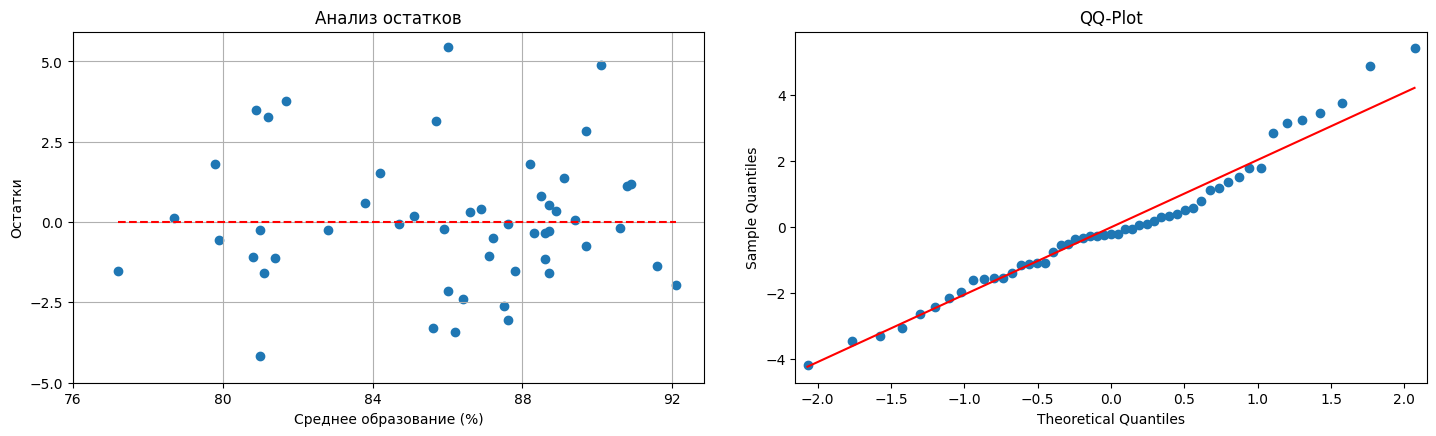

In [11]:
# получаем данные и вычисляем коэффициэнты регрессионной модели
intercept, slope = ols(formula="poverty ~ hs_grad", data=df).fit().params
X = df['hs_grad']
Y = df['poverty']

# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sm.qqplot(residuals, line='s', ax = ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)
plt.show()

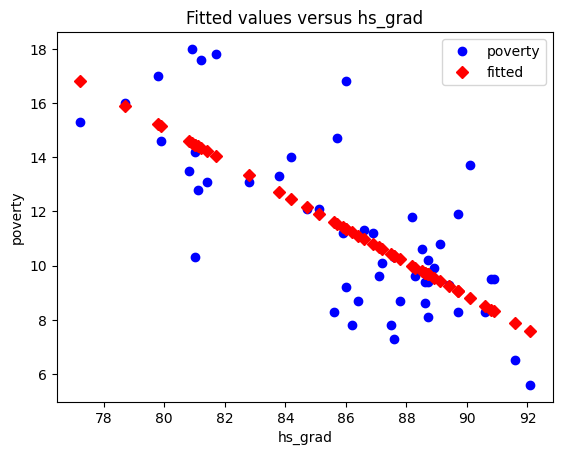

In [12]:
sm.graphics.plot_fit(OLS_model,1, vlines=False);

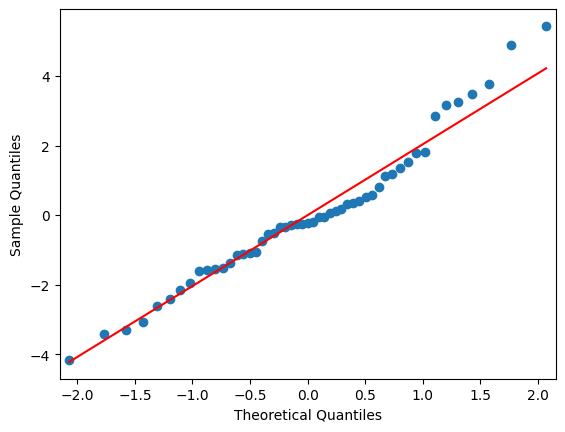

In [13]:
sm.qqplot(OLS_model.resid, line='s');

In [14]:
predicted = OLS_model.predict()  # predicted values
residual = OLS_model.resid # residual values

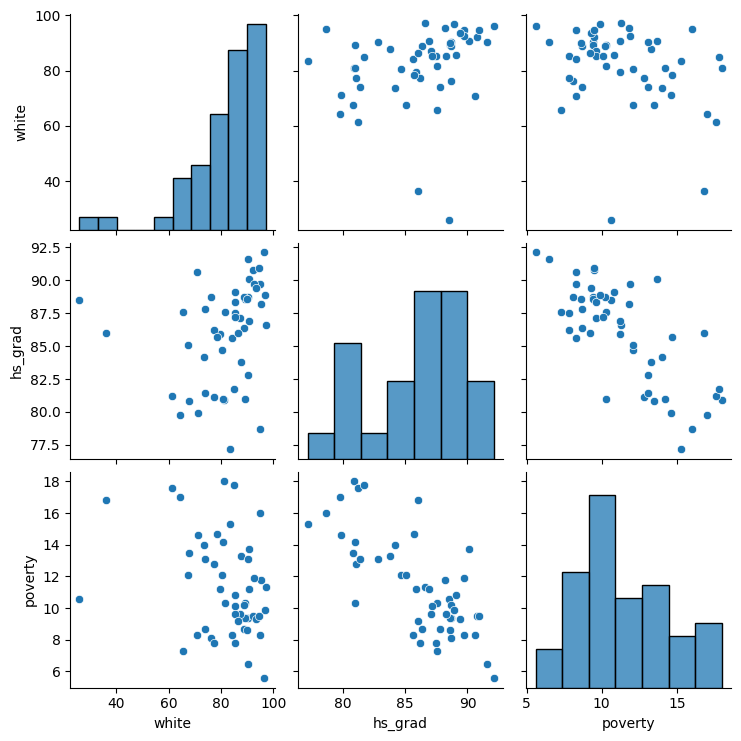

In [15]:
# График scatter matrix показывает взаимосвязь параметров между собой
# pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(15, 5));

# По аналогии с scatter matrix от pandas, только с помощью Seaborn
sns.pairplot(df[["white", "hs_grad","poverty"]]);

In [16]:
data = df

# Чтобы добавить переменные, следует просуммировать в формуле поля
lm = ols(formula='poverty ~ metro_res + white + hs_grad + female_house', data=data).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           8.88e-10
Time:                        07:32:51   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
'''
Программный перебор комбинаций НП
'''
# Найдём такой набор фичей, что R-squared максимальна
feats = {'metro_res', 'white', 'hs_grad', 'female_house'}

# Рекурсивно переберём все сочетания переменных
def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)

res = set()
brute_force(feats, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
for formula in res:
    lm = ols(formula='poverty ~ ' + formula, data=df).fit()
    print(f'{lm.rsquared_adj:.2}', formula)

0.58 metro_res + hs_grad
0.26 white + female_house
0.6 metro_res + female_house + hs_grad
0.077 white
0.62 metro_res + white + hs_grad
0.55 white + female_house + hs_grad
0.4 metro_res + female_house
0.39 metro_res + white + female_house
0.17 metro_res + white
0.26 female_house
0.56 white + hs_grad
0.55 female_house + hs_grad
0.022 metro_res
0.61 metro_res + white + female_house + hs_grad
0.55 hs_grad


In [19]:
# Итоговая модель
final_model = ols(formula='poverty ~ white + metro_res + hs_grad', data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           1.55e-10
Time:                        07:32:58   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.000      55.869      81.575
white         -0.0533      0.021     -2.483      0.017      -0.097      -0.010
metro_res     -0.0555      0.019     -2.926      0.005      -0.094      -0.017
hs_grad       -0.5697      0.075     -7.569      0.000      -0.721      -0.418
==============================================================================
Omnibus:                        3.479   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.230
Skew:                           0.607   Prob(JB):                        0.199
Kurtosis:                       2.787   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""